In [85]:
import numpy as np
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Input, AveragePooling2D
from keras.utils import np_utils
from keras.datasets import mnist, cifar10

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision

from matplotlib import pyplot as plt

In [67]:
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [68]:
X_test.shape

(10000, 28, 28)

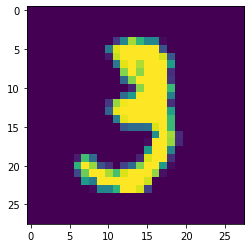

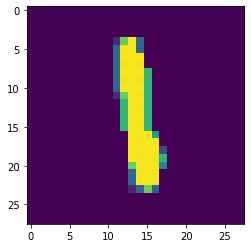

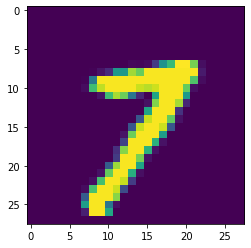

In [69]:
for i in [10, 200, 40000]:
    plt.imshow(X_train[i])
    plt.show()

In [70]:
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train_fcn, X_test_fcn = X_train.reshape(60000, 784), X_test.reshape(10000, 784)
X_train_cn, X_test_cn = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)


print(X_train_fcn.shape, X_train_cn.shape)

(60000, 784) (60000, 28, 28, 1)


In [71]:
y_train, y_test = np_utils.to_categorical(y_train, 10), np_utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [72]:
model = Sequential()
model.add(Dense(300, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [73]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3010      
Total params: 239,710
Trainable params: 239,110
Non-trainable params: 600
_________________________________________________________________


In [74]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

In [75]:
model.fit(
    X_train_fcn,
    y_train,
    batch_size=200,
    epochs=30,
    verbose=1,
    validation_data=(X_test_fcn, y_test)
)

Epoch 1/30
300/300 [==============================] - 2s 4ms/step - loss: 0.3152 - accuracy: 0.9061 - val_loss: 0.2368 - val_accuracy: 0.9485
Epoch 2/30
300/300 [==============================] - 1s 5ms/step - loss: 0.1364 - accuracy: 0.9614 - val_loss: 0.1172 - val_accuracy: 0.9668
Epoch 3/30
300/300 [==============================] - 2s 5ms/step - loss: 0.0967 - accuracy: 0.9727 - val_loss: 0.0951 - val_accuracy: 0.9726
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0750 - accuracy: 0.9792 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9837 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0484 - accuracy: 0.9878 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9900 - val_loss: 0.0725 - val_accuracy: 0.9790
Epoch 

## CNN approach

In [82]:
model = Sequential()

model.add(keras.Input(shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), stride=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(24, (3, 3), stride=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(24, (3, 3), stride=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 24)        3480      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 7, 7, 24)          96        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 24)        

In [84]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

model.fit(
    X_train_cn,
    y_train,
    batch_size=200,
    epochs=15,
    verbose=1,
    validation_data=(X_test_cn, y_test)
)

Epoch 1/15
300/300 [==============================] - 20s 65ms/step - loss: 0.2064 - accuracy: 0.9440 - val_loss: 1.3750 - val_accuracy: 0.4732
Epoch 2/15
300/300 [==============================] - 20s 68ms/step - loss: 0.0596 - accuracy: 0.9825 - val_loss: 0.0596 - val_accuracy: 0.9825
Epoch 3/15
300/300 [==============================] - 21s 68ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.0429 - val_accuracy: 0.9866
Epoch 4/15
300/300 [==============================] - 19s 64ms/step - loss: 0.0347 - accuracy: 0.9902 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 5/15
300/300 [==============================] - 21s 71ms/step - loss: 0.0294 - accuracy: 0.9916 - val_loss: 0.0387 - val_accuracy: 0.9886
Epoch 6/15
300/300 [==============================] - 20s 68ms/step - loss: 0.0249 - accuracy: 0.9935 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 7/15
300/300 [==============================] - 20s 67ms/step - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.0349 - val_accuracy:

## Check

[[6.7279946e-09 1.5780520e-08 2.6172330e-07 1.8351948e-07 8.4090668e-10
  3.8419337e-10 7.3735435e-13 9.9999928e-01 2.1178450e-09 2.3316434e-07]]
Digit 7


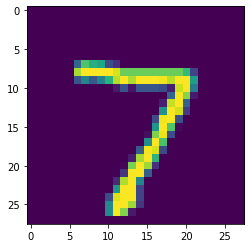

[[3.2531112e-08 3.4961349e-08 9.9999893e-01 6.0982603e-07 3.0028122e-11
  1.5854916e-11 4.1829711e-07 4.2047902e-12 4.2271939e-08 2.5424237e-11]]
Digit 2


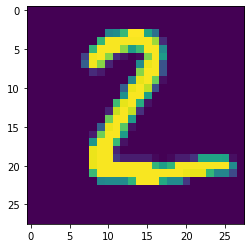

[[3.8462997e-05 9.9963427e-01 1.3283040e-05 3.7913999e-08 1.4370975e-04
  1.4835763e-07 1.6292937e-05 1.2825523e-04 2.3708659e-05 1.7881810e-06]]
Digit 1


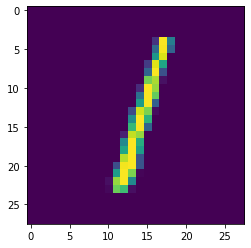

[[9.9997973e-01 2.2321200e-09 8.3486975e-07 2.6678875e-09 1.8905277e-09
  2.5421121e-08 1.6719850e-05 1.5713284e-09 4.4661203e-07 2.3260977e-06]]
Digit 0


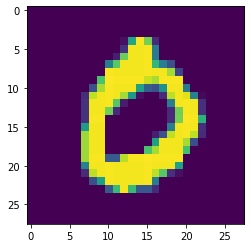

[[1.7997545e-08 1.3196143e-07 2.2677336e-08 1.9699150e-11 9.9999452e-01
  1.1885542e-07 8.0716809e-08 2.2456998e-08 3.9364909e-10 5.1590864e-06]]
Digit 4


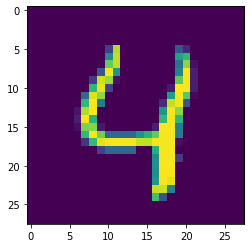

[[3.0431213e-06 9.9997747e-01 6.3877263e-07 1.5973579e-09 1.1663952e-05
  5.7040270e-09 1.2635270e-06 3.7002285e-06 2.2570323e-06 4.7979182e-08]]
Digit 1


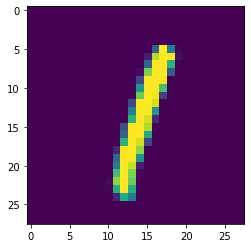

[[2.5312115e-09 3.2004366e-06 1.7178598e-05 1.2675251e-10 9.9889743e-01
  6.2773593e-06 1.9510448e-07 2.4457597e-06 1.2625534e-04 9.4702450e-04]]
Digit 4


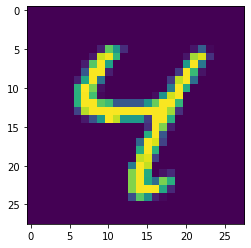

[[4.1479620e-07 8.6768948e-09 1.2910037e-07 7.3715813e-07 1.8643674e-04
  1.9999777e-06 7.4244416e-10 1.5626174e-08 1.1660766e-07 9.9981016e-01]]
Digit 9


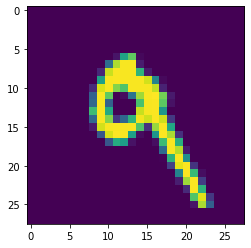

[[3.7454888e-07 1.7250767e-10 6.2720616e-08 1.0586467e-08 2.0593815e-07
  9.8434061e-01 1.5489454e-02 3.2259737e-10 1.6921871e-04 1.2172961e-08]]
Digit 5


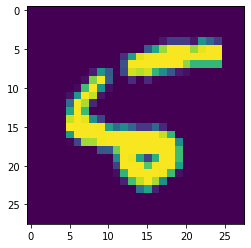

[[3.7560287e-08 3.9990186e-12 1.5307062e-07 3.9697551e-07 5.7665155e-05
  8.7617259e-08 2.3396404e-10 1.0121964e-05 2.0276195e-06 9.9992955e-01]]
Digit 9


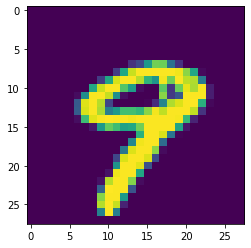

[[9.9999309e-01 6.3551020e-10 4.5670222e-06 1.0891121e-10 2.8383294e-11
  2.9605790e-08 1.6960091e-06 3.5210608e-09 6.8186473e-08 5.4347782e-07]]
Digit 0


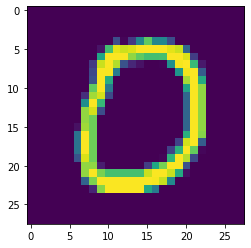

In [87]:
for i in range(11):
    prediction = model.predict(X_test_cn[i:i+1])
    print(prediction)
    print('Digit', prediction.argmax())
    plt.imshow(X_test_cn[i].reshape(28,28))
    plt.show()

## CNN origins - LeNet

In [88]:
lenet = Sequential()
lenet.add(keras.Input(shape=(28, 28, 1)))

lenet.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', activation='tanh'))
lenet.add(AveragePooling2D(pool_size=(2,2)))
lenet.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
lenet.add(AveragePooling2D(pool_size=(2,2)))
lenet.add(Flatten())
lenet.add(Dense(120, activation='tanh'))
lenet.add(Dense(84, activation='tanh'))
lenet.add(Dense(10, activation='softmax'))

lenet.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_20 (Dense)             (None, 84)              

In [89]:
lenet.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

lenet.fit(
    X_train_cn,
    y_train,
    batch_size=200,
    epochs=15,
    verbose=1,
    validation_data=(X_test_cn, y_test)
)

Epoch 1/15
300/300 [==============================] - 7s 23ms/step - loss: 0.5596 - accuracy: 0.8453 - val_loss: 0.2574 - val_accuracy: 0.9254
Epoch 2/15
300/300 [==============================] - 7s 23ms/step - loss: 0.2208 - accuracy: 0.9356 - val_loss: 0.1638 - val_accuracy: 0.9523
Epoch 3/15
300/300 [==============================] - 7s 23ms/step - loss: 0.1493 - accuracy: 0.9563 - val_loss: 0.1166 - val_accuracy: 0.9655
Epoch 4/15
300/300 [==============================] - 7s 24ms/step - loss: 0.1110 - accuracy: 0.9677 - val_loss: 0.0937 - val_accuracy: 0.9713
Epoch 5/15
300/300 [==============================] - 7s 24ms/step - loss: 0.0891 - accuracy: 0.9736 - val_loss: 0.0740 - val_accuracy: 0.9768
Epoch 6/15
300/300 [==============================] - 8s 25ms/step - loss: 0.0752 - accuracy: 0.9778 - val_loss: 0.0637 - val_accuracy: 0.9803
Epoch 7/15
300/300 [==============================] - 7s 22ms/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0613 - val_accuracy: 0.9803